# Ln likelihood. 
This is just running lnlikelihood for a set group of values, rather than doing the

In [1]:
%run binary_detection.py
%run binary_params.py

%run jitter.py
%run rv_from_param.py
%run chi_sq_mean.py
%run second_reduce.py
%run table_convert.py

%run synthetic_galaxy.py
%run machine_error.py
%run error_with_jitter.py
%run binary_fraction.py

In [2]:
from astropy.io import fits
from astropy.table import Table

In [3]:
smc = fits.getdata('all-average-smc.fits')
smc = table_convert(smc)
smc = second_reduce(Table(smc))
smc['RADIALV'].unit = u.km/u.s
smc['RADIAL_ERR'].unit = u.km/u.s

In [22]:
import datetime
import numpy as np
%run lnlikelihood.py
fractions = np.linspace(0, 1, 15)
a_range = [0,0.3,0.6]
b = 0.6
# lnlikelihood = np.zeros((len(fractions),len(a_range)))
all_likelihood = []
for m in range(len(a_range)):
    
    smc_err_j = error_with_jitter(smc['RADIAL_ERR'], a_range[m], 0.61, smc['LOGG'])

    smc_detection_rate_j = binary_fraction(smc['RADIALV'], smc_err_j)
    
    lnl = []
    for n in range(len(fractions)):
        lnl.append(lnlikelihood(smc_detection_rate_j, 30, 
                                         smc, 
                                         fractions[n],
                                         100*u.jupiterMass,
                                         3, 2,
                                         a_range[m],
                                         0.61))
    print("Done with,", a_range[m])
    all_likelihood.append(lnl)

Done with  0
Done with  1
Done with  2
Done with  3
Done with  4
Done with  5
Done with  6
Done with  7
Done with  8
Done with  9
Done with  10
Done with  11
Done with  12
Done with  13
Done with  14
Done with  15
Done with  16
Done with  17
Done with  18
Done with  19
Done with  20
Done with  21
Done with  22
Done with  23
Done with  24
Done with  25
Done with  26
Done with  27
Done with  28
Done with  29
Done with  0
Done with  1
Done with  2
Done with  3
Done with  4
Done with  5
Done with  6
Done with  7
Done with  8
Done with  9
Done with  10
Done with  11
Done with  12
Done with  13
Done with  14
Done with  15
Done with  16
Done with  17
Done with  18
Done with  19
Done with  20
Done with  21
Done with  22
Done with  23
Done with  24
Done with  25
Done with  26
Done with  27
Done with  28
Done with  29
Done with  0
Done with  1
Done with  2
Done with  3
Done with  4
Done with  5
Done with  6
Done with  7
Done with  8
Done with  9
Done with  10
Done with  11
Done with  12
Done wit

Done with  0
Done with  1
Done with  2
Done with  3
Done with  4
Done with  5
Done with  6
Done with  7
Done with  8
Done with  9
Done with  10
Done with  11
Done with  12
Done with  13
Done with  14
Done with  15
Done with  16
Done with  17
Done with  18
Done with  19
Done with  20
Done with  21
Done with  22
Done with  23
Done with  24
Done with  25
Done with  26
Done with  27
Done with  28
Done with  29
Done with  0
Done with  1
Done with  2
Done with  3
Done with  4
Done with  5
Done with  6
Done with  7
Done with  8
Done with  9
Done with  10
Done with  11
Done with  12
Done with  13
Done with  14
Done with  15
Done with  16
Done with  17
Done with  18
Done with  19
Done with  20
Done with  21
Done with  22
Done with  23
Done with  24
Done with  25
Done with  26
Done with  27
Done with  28
Done with  29
Done with  0
Done with  1
Done with  2
Done with  3
Done with  4
Done with  5
Done with  6
Done with  7
Done with  8
Done with  9
Done with  10
Done with  11
Done with  12
Done wit

Done with  29
Done with  0
Done with  1
Done with  2
Done with  3
Done with  4
Done with  5
Done with  6
Done with  7
Done with  8
Done with  9
Done with  10
Done with  11
Done with  12
Done with  13
Done with  14
Done with  15
Done with  16
Done with  17
Done with  18
Done with  19
Done with  20
Done with  21
Done with  22
Done with  23
Done with  24
Done with  25
Done with  26
Done with  27
Done with  28
Done with  29
Done with  0
Done with  1
Done with  2
Done with  3
Done with  4
Done with  5
Done with  6
Done with  7
Done with  8
Done with  9
Done with  10
Done with  11
Done with  12
Done with  13
Done with  14
Done with  15
Done with  16
Done with  17
Done with  18
Done with  19
Done with  20
Done with  21
Done with  22
Done with  23
Done with  24
Done with  25
Done with  26
Done with  27
Done with  28
Done with  29
Done with  0
Done with  1
Done with  2
Done with  3
Done with  4
Done with  5
Done with  6
Done with  7
Done with  8
Done with  9
Done with  10
Done with  11
Done wit

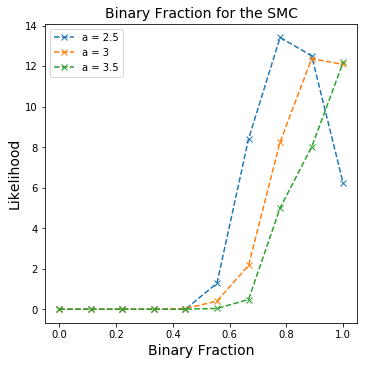

In [37]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(5.6,5.5))
for n in range(len(all_likelihood)):
    plt.plot(fractions[:], np.exp(np.array(all_likelihood[n][:])), 'x--',label = 'a = {}'.format(a_range[n]),)  
plt.legend()
plt.title("Binary Fraction for the SMC", size = 14)
plt.xlabel("Binary Fraction", size = 14)
plt.ylabel('Likelihood', size = 14)
plt.savefig('/home/cody/Binary Search/AAS Seattle Talk/smc-binary-fracion.png')

In [35]:
import datetime
import numpy as np
%run lnlikelihood.py
fractions = np.linspace(0, 1, 10)
a_range = [2.5, 3, 3.5]
b = 0.61
# lnlikelihood = np.zeros((len(fractions),len(a_range)))
all_likelihood = []
for m in range(len(a_range)):
    
    smc_err_j = error_with_jitter(smc['RADIAL_ERR'], 0.3, 0.61, smc['LOGG'])

    smc_detection_rate = binary_fraction(smc['RADIALV'],
                                     smc["RADIAL_ERR"])
    smc_detection_rate_j = binary_fraction(smc['RADIALV'], smc_err_j)
    
    lnl = []
    for n in range(len(fractions)):
        lnl.append(lnlikelihood(smc_detection_rate_j, 30, 
                                         smc, 
                                         fractions[n],
                                         100*u.jupiterMass,
                                         a_range[m], 2.2,
                                         0.3,
                                         0.61))
    print("Done with,", a_range[m])
    all_likelihood.append(lnl)

Done with  0
Done with  1
Done with  2
Done with  3
Done with  4
Done with  5
Done with  6
Done with  7
Done with  8
Done with  9
Done with  10
Done with  11
Done with  12
Done with  13
Done with  14
Done with  15
Done with  16
Done with  17
Done with  18
Done with  19
Done with  20
Done with  21
Done with  22
Done with  23
Done with  24
Done with  25
Done with  26
Done with  27
Done with  28
Done with  29
Done with  0
Done with  1
Done with  2
Done with  3
Done with  4
Done with  5
Done with  6
Done with  7
Done with  8
Done with  9
Done with  10
Done with  11
Done with  12
Done with  13
Done with  14
Done with  15
Done with  16
Done with  17
Done with  18
Done with  19
Done with  20
Done with  21
Done with  22
Done with  23
Done with  24
Done with  25
Done with  26
Done with  27
Done with  28
Done with  29
Done with  0
Done with  1
Done with  2
Done with  3
Done with  4
Done with  5
Done with  6
Done with  7
Done with  8
Done with  9
Done with  10
Done with  11
Done with  12
Done wit

Done with  29
Done with, 3
Done with  0
Done with  1
Done with  2
Done with  3
Done with  4
Done with  5
Done with  6
Done with  7
Done with  8
Done with  9
Done with  10
Done with  11
Done with  12
Done with  13
Done with  14
Done with  15
Done with  16
Done with  17
Done with  18
Done with  19
Done with  20
Done with  21
Done with  22
Done with  23
Done with  24
Done with  25
Done with  26
Done with  27
Done with  28
Done with  29
Done with  0
Done with  1
Done with  2
Done with  3
Done with  4
Done with  5
Done with  6
Done with  7
Done with  8
Done with  9
Done with  10
Done with  11
Done with  12
Done with  13
Done with  14
Done with  15
Done with  16
Done with  17
Done with  18
Done with  19
Done with  20
Done with  21
Done with  22
Done with  23
Done with  24
Done with  25
Done with  26
Done with  27
Done with  28
Done with  29
Done with  0
Done with  1
Done with  2
Done with  3
Done with  4
Done with  5
Done with  6
Done with  7
Done with  8
Done with  9
Done with  10
Done with

Text(0, 0.5, '$\\ln$ Likelihood')

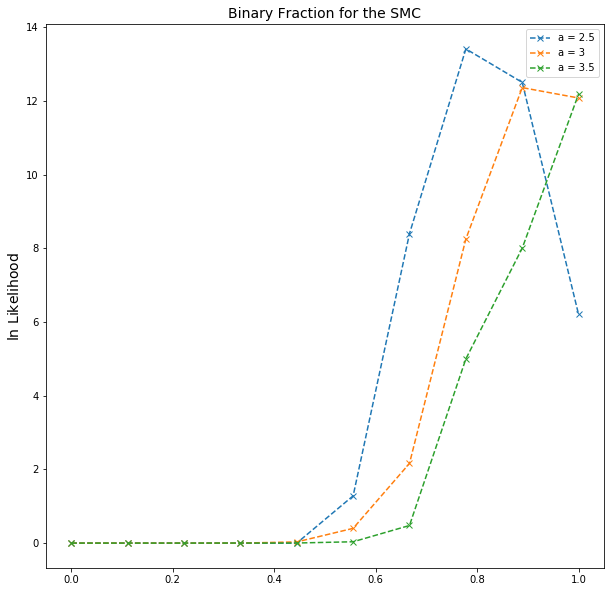

In [36]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for n in range(len(all_likelihood)):
    plt.plot(fractions[:], np.exp(np.array(all_likelihood[n][:])), 'x--',label = 'a = {}'.format(a_range[n]),)  
plt.legend()
plt.title("Binary Fraction for the SMC", size = 14)
plt.ylabel('$\ln$ Likelihood', size = 14)

In [ ]:
x = 

Text(0, 0.5, 'Likelihood')

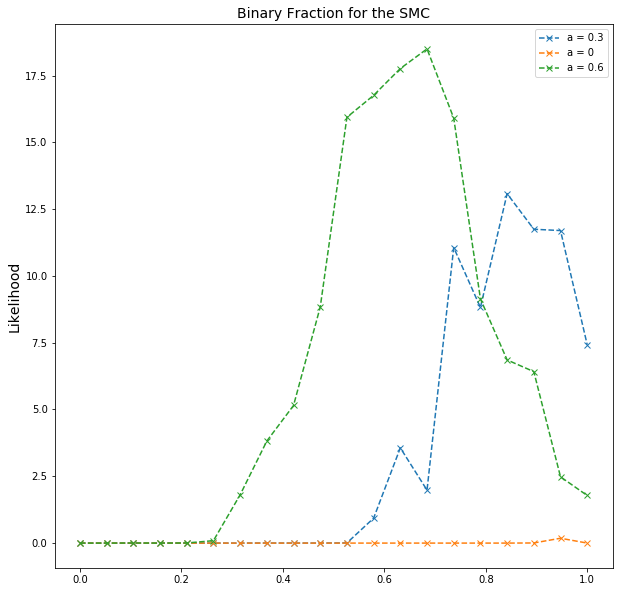

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for n in range(len(all_likelihood)):
    plt.plot(fractions[:], np.exp(np.array(all_likelihood[n][:])), 'x--',label = 'a = {}'.format(a_range[n]),)  
plt.legend()
plt.title("Binary Fraction for the SMC", size = 14)
plt.ylabel('Likelihood', size = 14)

(array([1., 0., 2., 1., 2., 3., 3., 3., 3., 2.]),
 array([0.07804878, 0.08487805, 0.09170732, 0.09853659, 0.10536585,
        0.11219512, 0.11902439, 0.12585366, 0.13268293, 0.1395122 ,
        0.14634146]),
 <a list of 10 Patch objects>)

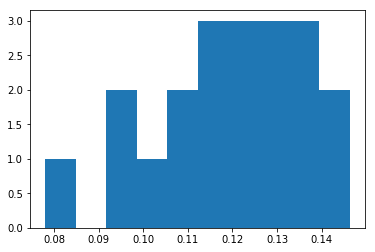

In [16]:
plt.hist(syn_list)

In [17]:
smc_err_j = error_with_jitter(smc['RADIAL_ERR'], a_range[m], 0.61, smc['LOGG'])
smc_detection_rate_j = binary_fraction(smc['RADIALV'], smc_err_j)

In [18]:
smc_detection_rate_j

0.15609756097560976